### 다중분류(Multi-Class Classification)
---
- 3 개 이상의 답 중 1개를 고르는 경우
- 비용함수(Cost Function)  => Cross Entropy
    * 이진 교차 엔트로피(Binary Cross Entropy)와 유사한 방식으로 계산

In [69]:
# 모듈 로딩
import torch
import torch.nn.functional as F

In [70]:
# 랜덤 시드 설정
torch.manual_seed(1)

In [71]:
# 데이터 생성
z = torch.FloatTensor([1, 2, 3])
print(z.shape, f'{z.ndim}차원', z)

torch.Size([3]) 1차원 tensor([1., 2., 3.])


In [72]:
# 소프트맥스 함수 적용
# F.softmax(텐서, dim=softmax를 수행할 차원)
hypothesis = F.softmax(z, dim=0) # dim=0 : 소프트맥스를 계산할 차원을 지정(여기서는 0번째 차원을 기준 / 소프트맥스 계산 )
print(hypothesis, hypothesis.sum()) # 소프트맥스 함수를 적용한 결과인 hypothesis와 그 합을 계산하여 출력


# 소프트맥스 함수는 각 클래스에 대한 확률을 계산
# 이 확률은 0부터 1 사이의 값으로 정규화되기 때문에 소프트맥스 함수를 적용한 결과의 모든 요소를 합하면 => 1

tensor([0.0900, 0.2447, 0.6652]) tensor(1.)


In [73]:
z2 = torch.rand(3, 5, requires_grad=True) # ( 무작위의 실수가 들어있는 3 X 5 행렬 )
print(z2.shape, f'{z2.ndim}차원', z2, sep='\n')

torch.Size([3, 5])
2차원
tensor([[0.7576, 0.2793, 0.4031, 0.7347, 0.0293],
        [0.7999, 0.3971, 0.7544, 0.5695, 0.4388],
        [0.6387, 0.5247, 0.6826, 0.3051, 0.4635]], requires_grad=True)


torch.rand
- 주어진 모양에 맞는 텐서를 만들고, 그 텐서의 각 요소에 대해 0과 1 사이의 무작위한 값을 할당
- requires_grad = True : 기울기 계산. ( 텐서를 사용하여 역전파 과정을 수행 )

In [74]:
# dim=1 ==> (3, 5)에서 5가지에 대한 값 

hypothesis = F.softmax(z2, dim=1) # 예측 확률을 계산.  dim =1 이므로 1번째 차원을 기준으로 소프트맥스를 계산

print(hypothesis, hypothesis.sum())
#소프트맥스 함수를 적용한 결과인 hypothesis와 그 각각의 합을 계산하여 출력 (행별로 1 + 1 + 1)

tensor([[0.2645, 0.1639, 0.1855, 0.2585, 0.1277],
        [0.2430, 0.1624, 0.2322, 0.1930, 0.1694],
        [0.2226, 0.1986, 0.2326, 0.1594, 0.1868]], grad_fn=<SoftmaxBackward0>) tensor(3.0000, grad_fn=<SumBackward0>)


### One-Hot-Encoding
- squeeze() / unsqueeze() 살펴보기

In [75]:
torch.manual_seed(3)

y = torch.randint(0, 3, (3,))  # 0부터 3사이의 수 3개로 만들어진 1차원 데이터
y2= y.unsqueeze(1) # 3X1 차원을 하나 늘려서 2차원 데이터로 만듦. 
y, y2, y2.shape

(tensor([1, 2, 1]),
 tensor([[1],
         [2],
         [1]]),
 torch.Size([3, 1]))

scatter_(dim, index, src)
- dim: 값을 할당할 차원을 지정합니다.
- index: 값을 할당할 위치를 나타내는 인덱스입니다.
- src: 할당할 값을 나타내는 텐서입니다.


In [76]:
# hypothesis와 사이즈가 같지만 0으로만 이뤄진 2차원 텐서 생성.
# hypothesis = z2(3X5행렬 2차원 데이터)에 소프트맥스 함수를 적용한 것. 사이즈 : 3X5
y_one_hot = torch.zeros_like(hypothesis) 

y_one_hot.scatter_(1, y2, 1)

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.]])

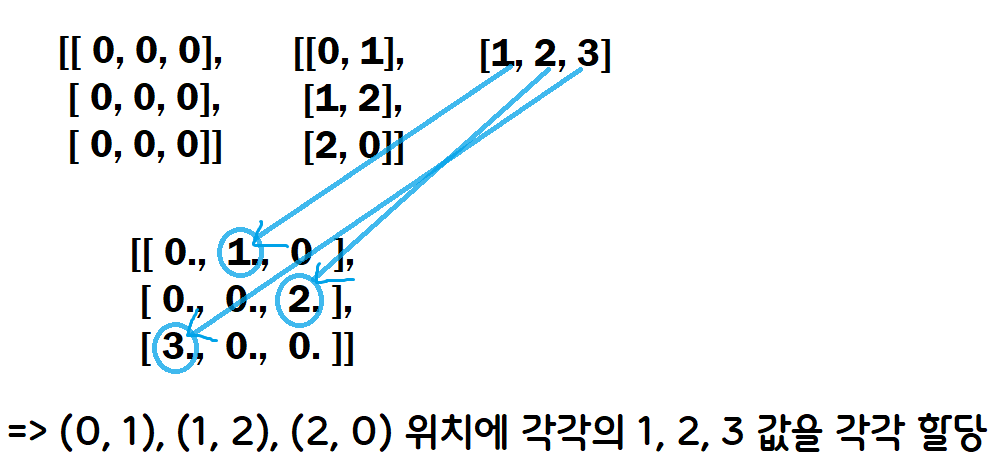

In [77]:
# 1차원 제거
torch.manual_seed(3)
x = torch.rand(1, 1, 20, 128) # (배치크기, 채널, 높이, 너비)
print(x)
print(x.shape, x.ndim) #차원 그래프 

tensor([[[[0.0043, 0.1056, 0.2858,  ..., 0.2706, 0.6352, 0.4888],
          [0.4066, 0.5307, 0.9571,  ..., 0.0666, 0.4933, 0.0655],
          [0.9539, 0.9048, 0.7793,  ..., 0.0467, 0.0032, 0.0945],
          ...,
          [0.2051, 0.5396, 0.8677,  ..., 0.7752, 0.6536, 0.3764],
          [0.2447, 0.6102, 0.1683,  ..., 0.8106, 0.8207, 0.4446],
          [0.3372, 0.0786, 0.3983,  ..., 0.1773, 0.6880, 0.9200]]]])
torch.Size([1, 1, 20, 128]) 4


In [78]:
# 1차원 모두 제거
x1 = x.squeeze() #[1, 1, 20, 128] -> [20, 128]
x, x1, x1.shape, x1.ndim

(tensor([[[[0.0043, 0.1056, 0.2858,  ..., 0.2706, 0.6352, 0.4888],
           [0.4066, 0.5307, 0.9571,  ..., 0.0666, 0.4933, 0.0655],
           [0.9539, 0.9048, 0.7793,  ..., 0.0467, 0.0032, 0.0945],
           ...,
           [0.2051, 0.5396, 0.8677,  ..., 0.7752, 0.6536, 0.3764],
           [0.2447, 0.6102, 0.1683,  ..., 0.8106, 0.8207, 0.4446],
           [0.3372, 0.0786, 0.3983,  ..., 0.1773, 0.6880, 0.9200]]]]),
 tensor([[0.0043, 0.1056, 0.2858,  ..., 0.2706, 0.6352, 0.4888],
         [0.4066, 0.5307, 0.9571,  ..., 0.0666, 0.4933, 0.0655],
         [0.9539, 0.9048, 0.7793,  ..., 0.0467, 0.0032, 0.0945],
         ...,
         [0.2051, 0.5396, 0.8677,  ..., 0.7752, 0.6536, 0.3764],
         [0.2447, 0.6102, 0.1683,  ..., 0.8106, 0.8207, 0.4446],
         [0.3372, 0.0786, 0.3983,  ..., 0.1773, 0.6880, 0.9200]]),
 torch.Size([20, 128]),
 2)

In [79]:
x2 = x.squeeze(dim=0) #[1, 1, 20, 128] -> [1, 20, 128] 제일 바깥쪽에 있는 한 차원 없어짐.
x2.shape, x2.ndim

(torch.Size([1, 20, 128]), 3)

In [80]:
xx = torch.rand(3,20,128)
xx.shape, xx.ndim

(torch.Size([3, 20, 128]), 3)

In [81]:
xx1 = xx.unsqueeze(dim=1) # (3, "1", 20, 128) 한 차원 추가됨.
xx.shape, xx.ndim

(torch.Size([3, 20, 128]), 3)

In [82]:
xx2 = xx.unsqueeze(dim=0) #[3, 20, 128] -> ["1", 3, 20, 128] # 제일 바깥쪽에 차원 한 개 더 생성.
xx2.shape

torch.Size([1, 3, 20, 128])

In [83]:
# 임의의 라벨 데이터 생성
torch.manual_seed(3)
y = torch.randint(5, (3,)).long() #long = int64
y, y.shape #  0부터 4까지의 정수 중에서 랜덤으로 선택된 수로 길이가 3인 정수형 텐서를 생성 후, 그 데이터 타입을 64비트 정수로 지정


(tensor([1, 3, 2]), torch.Size([3]))

In [84]:
y.unsqueeze(1) # 차원 늘리기(default값은 0)

tensor([[1],
        [3],
        [2]])

In [85]:
# 모든 원소가 0의 값을 가진 3 × 5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis) 

y_one_hot

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [86]:
#dim=axis, index, src, reduce=None
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.]])

## nn.Module 활용 구현

In [87]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [88]:
torch.manual_seed(1)

In [89]:
# 데이터 준비 ------------------------------
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [1, 1, 1, 0, 0, 0, 1, 1]
x_train = torch.FloatTensor(x_train) # 2차원 리스트를 실수 텐서로 변경.
y_train = torch.LongTensor(y_train) # 1차원 리스트를 int64 텐서로 변경.

In [90]:
print(x_train.shape,  y_train.shape)

torch.Size([8, 4]) torch.Size([8])


In [101]:
# One-Hot-Encoding 라벨

y_one_hot = torch.zeros(8, 2)
print(y_one_hot)
print(y_train.unsqueeze(1)) # 2차원으로 만들기
print(y_train.unsqueeze(1).shape) #8X1
# print(y_train.unsqueeze(1)[0][0])

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[1],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1]])
torch.Size([8, 1])
tensor(1)


In [92]:
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print(y_one_hot.shape, y_one_hot, sep='\n')

torch.Size([8, 2])
tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])


In [102]:
# 모델 설계 및 초기화
# 4개의 특성을 가지고 3개의 클래스로 분류 input = 4 / output = 3
model = nn.Linear(4, 3)

# 4개의 특성을 가지고 2개의 클래스로 분류 input = 4 / output = 2
model = nn.Linear(4, 2)

In [105]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1) 

# 확률적 경사 하강법(Stochastic Gradient Descent, SGD) 옵티마이저를 설정. 
# model.parameters(): 모델의 학습 가능한 모든 파라미터를 반환하는 메서드(모델의 가중치와 편향 등 포함)
# 학습률 0.1

In [107]:
# 학습 -----------------------------------------------
nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # 예측값 H(x) 계산
    prediction = model(x_train)

    # 훈련용 데이터의 오차를 계산하기 위한 손실함수 cost 계산 --> 분류기 때문에 cross_entropy사용. 
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad() # 기울기 초기화.
    cost.backward() # 역전파 : 손실 함수를 미분하여 모델의 파라미터에 대한 그래디언트를 계산
    optimizer.step() # 옵티마이저에 지정된 학습률(lr=0.1)에 따라 모델의 파라미터를 업데이트

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print(f'Epoch {epoch:4d}/{nb_epochs} Cost: {cost.item():.6f}')
        #print(cost) ==> tensor(0.9154, grad_fn=<NllLossBackward0>) 이런 식으로 나와서 item으로 값만 꺼내옴.
        # 에포크 : 현재 학습횟수(백단위)/전체 학습횟수 cost : 손실함수 값.

Epoch    0/1000 Cost: 0.810025
Epoch  100/1000 Cost: 0.810142
Epoch  200/1000 Cost: 0.810247
Epoch  300/1000 Cost: 0.810344
Epoch  400/1000 Cost: 0.810431
Epoch  500/1000 Cost: 0.810510
Epoch  600/1000 Cost: 0.810582
Epoch  700/1000 Cost: 0.810648
Epoch  800/1000 Cost: 0.810708
Epoch  900/1000 Cost: 0.810762
Epoch 1000/1000 Cost: 0.810811
